In [1]:
%cd ..

/home/broise/tmp_projects/fb_impact


## Analysis of a Facebook dataset
This dataset contains 500 datapoints and 19 columns. 

The columns include Categorical (Type, Category, Post Weekday) and numerical values (Lifetime Post Consumption).

The goal of the project is to predict the impact of a post based on meta data about the page and timing of the post.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

In [3]:
ds = pd.read_csv("./data/raw/dataset_Facebook.csv", sep=";")

In [4]:
ds.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
ds = ds.dropna(axis=0)

In [6]:
print(len(ds[ds.isna().any(axis=1)]))

0


In [7]:
ds.shape

(495, 19)

as there is not many NaN values (1% of the data), I will remove rows containing NaN values

+ I already change some of the categorical variables to their dummy variant

In [8]:
ds_processed = pd.concat([pd.get_dummies(ds.Category), ds], axis=1)
ds_processed = pd.concat([pd.get_dummies(ds_processed.Type), ds_processed], axis=1)
ds_processed = ds_processed.rename(
    columns={1: "category_1", 2: "category_2", 3: "category_3"}
)

In [9]:
ds_processed.head(5)

,Link,Photo,Status,Video,category_1,category_2,category_3,Page total likes,Type,Category,...,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,1,0,0,0,1,0,139441,Photo,2,...,178,109,159,3078,1640,119,4,79.0,17.0,100
1,0,0,1,0,0,1,0,139441,Status,2,...,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,0,1,0,0,0,0,1,139441,Photo,3,...,177,113,154,2812,1503,132,0,66.0,14.0,80
3,0,1,0,0,0,1,0,139441,Photo,2,...,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,0,1,0,0,0,1,0,139441,Photo,2,...,671,410,580,6228,3200,396,19,325.0,49.0,393


Let us find some statistics about our columns

In [10]:
ds_processed.describe()

,Link,Photo,Status,Video,category_1,category_2,category_3,Page total likes,Category,Post Month,...,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.044444,0.850505,0.090909,0.014141,0.426263,0.260606,0.313131,123173.268687,1.886869,7.028283,...,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,0.206289,0.356936,0.287771,0.118193,0.495033,0.439409,0.464236,16203.818031,0.853268,3.304274,...,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81370.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112324.000000,1.000000,4.000000,...,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129600.000000,2.000000,7.000000,...,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,136393.000000,3.000000,10.000000,...,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,139441.000000,3.000000,12.000000,...,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


In [11]:
ds_processed.columns

Index(['Link', 'Photo', 'Status', 'Video', 'category_1', 'category_2',
       'category_3', 'Page total likes', 'Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

From this statistics we can say:
+ 85% of the posts in the data are Photos, 9% status, 4.4% links and 1.4% videos.
+ The average number of likes on the selected pages is ~130000 (median)
+ The pages post on average 7 times a month with a quite important standard deviation of 3.3
+ The lifetime post consumption is 861 on average (using median to dodge outliers) with a very big standard deviation to the right. As the deviation is bigger than the mean and the value must be positive, we can guess the distribution is likely to be positively skewed.
+ on average the number of likes on a post is roughly 33 times the number of comments. (comparing the median)

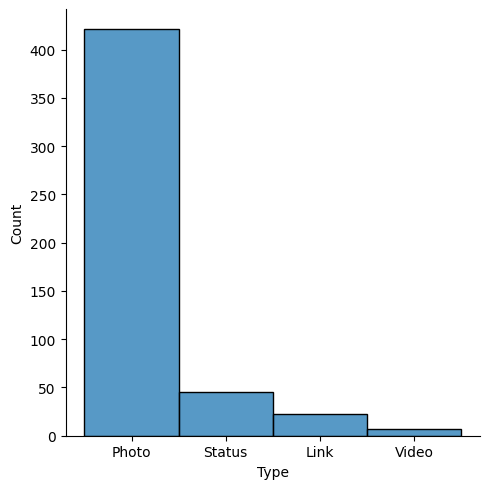

In [12]:
sns.displot(ds.Type)

let's look at the skewness of the lifetime post consumption

skewnee: 4.786


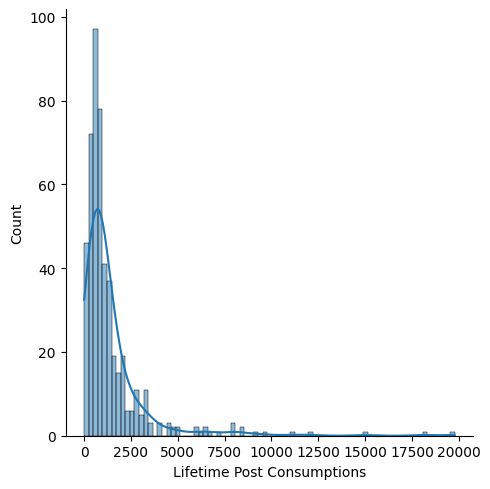

In [13]:
sns.displot(ds["Lifetime Post Consumptions"], kde=True)
print(f"skewnee: {scipy.stats.skew(ds['Lifetime Post Consumptions']):.3f}")

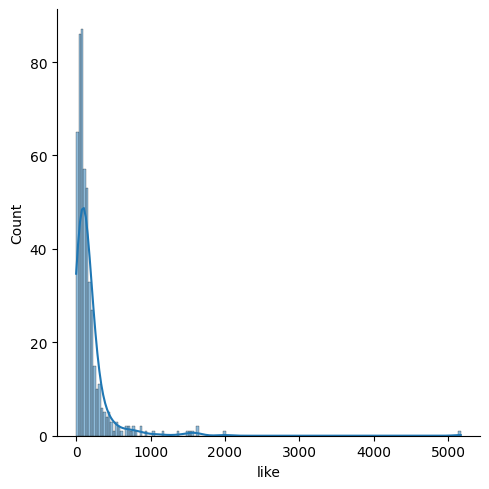

In [14]:
sns.displot(ds["like"], kde=True)

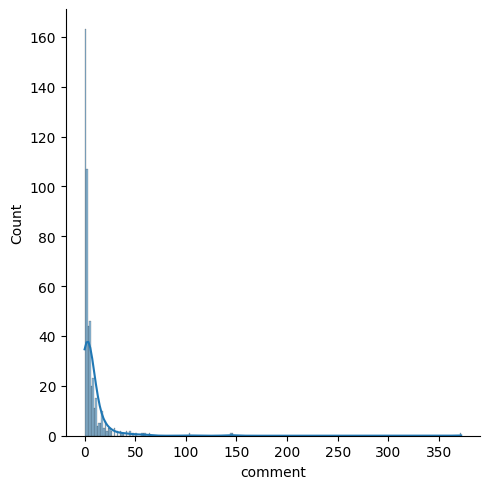

In [15]:
sns.displot(ds.comment, kde=True)

Many of the distributions seem to be heavy tailed. Indeed making very impactful post is a rare occurence.

## Study of correlations

We will study the correlation between some features and metrics to evaluate the potential usefulness of some features to predict the impact of a publication

As a sanity check, we will start by checking correlation of likes and comments

In [16]:
np.corrcoef(ds_processed.comment, ds_processed.like)

array([[1.        , 0.83773667],
       [0.83773667, 1.        ]])

<AxesSubplot: xlabel='comment', ylabel='like'>

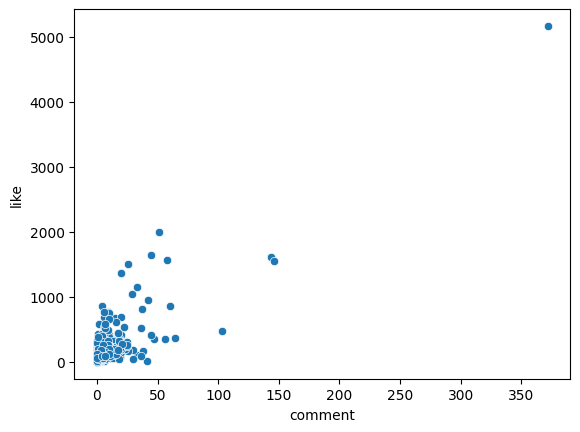

In [17]:
sns.scatterplot(ds_processed[["comment", "like"]], x="comment", y="like")

<AxesSubplot: xlabel='Page total likes', ylabel='like'>

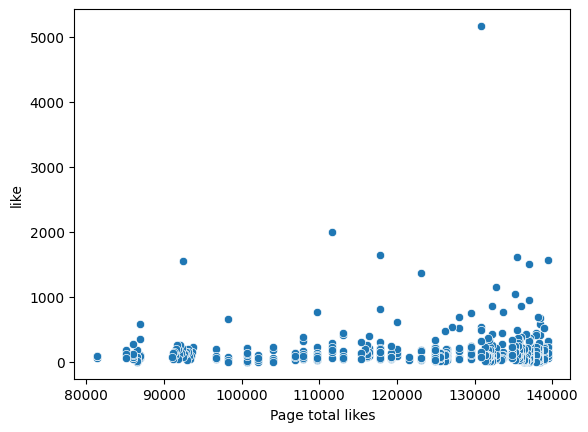

In [18]:
sns.scatterplot(
    ds_processed[["Page total likes", "like"]], x="Page total likes", y="like"
)

In [19]:
np.corrcoef(ds_processed["Page total likes"], ds_processed.like)

array([[1.        , 0.05490564],
       [0.05490564, 1.        ]])

The number of likes on a page does not seem to be very meaningful to predict the number of likes on a post of said page. Maybe, highly impactful posts are rare events that are  not easily reproducable even for big pages.

This result suggest that has expected, comments and likes are strongly positively correlated.

We will now check the correlation between different types of post and likes

In [20]:
np.corrcoef(ds_processed.like, ds_processed["Lifetime Engaged Users"])

array([[1.        , 0.56860819],
       [0.56860819, 1.        ]])

There is also a positive correlation between the size of the page and the number of likes per post 

In [21]:
print(
    f"correlation photo, likes: {np.corrcoef(ds_processed.Photo, ds_processed.like)[0,1]:3f}"
)
print(
    f"correlation status, likes: {np.corrcoef(ds_processed.Status, ds_processed.like)[0,1]:3f}"
)
print(
    f"correlation video, likes: {np.corrcoef(ds_processed.Video, ds_processed.like)[0,1]:3f}"
)
print(
    f"correlation link, likes: {np.corrcoef(ds_processed.Link, ds_processed.like)[0,1]:3f}"
)

correlation photo, likes: 0.036218
correlation status, likes: -0.002375
correlation video, likes: 0.019322
correlation link, likes: -0.070424


the correlatio between the type of status and the number of like does not seem to be significant

In [22]:
print(
    f"correlation category_1, likes: {np.corrcoef(ds_processed.category_1, ds_processed.like)[0,1]:3f}"
)
print(
    f"correlation category_2, likes: {np.corrcoef(ds_processed.category_2, ds_processed.like)[0,1]:3f}"
)
print(
    f"correlation category_3, likes: {np.corrcoef(ds_processed.category_3, ds_processed.like)[0,1]:3f}"
)

correlation category_1, likes: -0.139924
correlation category_2, likes: 0.074287
correlation category_3, likes: 0.078892


Category seems to be somewhat correlated with likes. However, in the kaggle dataset description there is no mention of what "Category" actually means 